In [1]:
import numpy as np
import tomopy

In [2]:
import matplotlib.pyplot as plt
import tike

In [38]:
def fresnel_propagation_ac(t, z, dx=1e-6, wavelength=1e-10):
    """
    Propagate a plane wave using the method of Adrian Carbajal-Dominguez et al.

    Carbajal-Domínguez, Adrián, Jorge Bernal Arroyo, Jesus E. Gomez Correa,
    and Gabriel Martínez Niconoff. "Numerical calculation of near field
    scalar diffraction using angular spectrum of plane waves theory and FFT."
    Revista mexicana de física E 56, no. 2 (2010): 159-164.
    https://arxiv.org/abs/1002.1999v1

    Parameters
    ----------
    t : complex 2D array
        the complex transmission function
    dx : float [m]
        the width of a square pixel on the transmission function grid
    z : float [m]
        the distance of the propagation
    wavelength : float [m]
        the wavelength of the light

    """
    M, N = t.shape
    # u, v are the locations of pixel centers of t
    u, v = np.meshgrid(
        np.linspace(dx * (1 - M) / 2, dx * (1 + M) / 2, M, endpoint=False),
        np.linspace(dx * (1 - N) / 2, dx * (1 + N) / 2, N, endpoint=False),
        indexing='ij',
    )

    # p is the propagation direction. See Eq. 9
    p = np.empty_like(t)
    k = 1 / wavelength  # wavenumber / 2 / PI
    case1 = k**2 > u**2 + v**2
    p[case1] = np.sqrt(k**2 - u[case1]**2 - v[case1]**2)
    case2 = k**2 < u**2 + v**2
    p[case2] = 1j * np.sqrt(u[case2]**2 + v[case2]**2 - k**2)

    tike.plot_complex(p)
    
    # See Eq. 17
    A = np.fft.fftshift(np.fft.fft2(t))

    # See Eq. 18
    G = np.exp(1j * 2 * np.pi * z * p)

    return np.fft.ifft2(A * G)

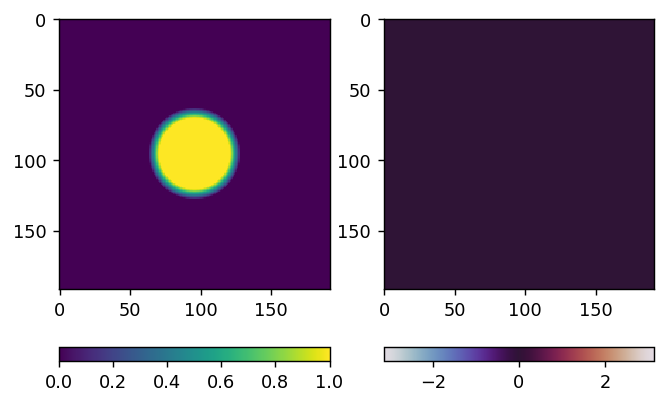

0.0 1.0


In [36]:
A = np.pad(tike.ptycho.gaussian(64), 64, mode='constant')
tike.plot_phase(A)

/opt/miniconda/envs/tike/lib/python3.7/site-packages/ipykernel_launcher.py:37: ComplexWarning: Casting complex values to real discards the imaginary part


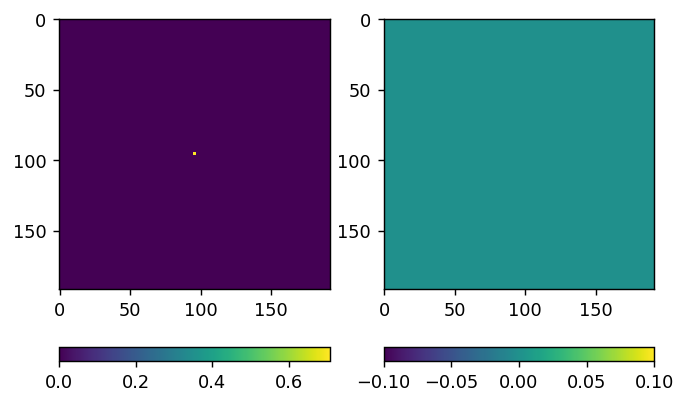

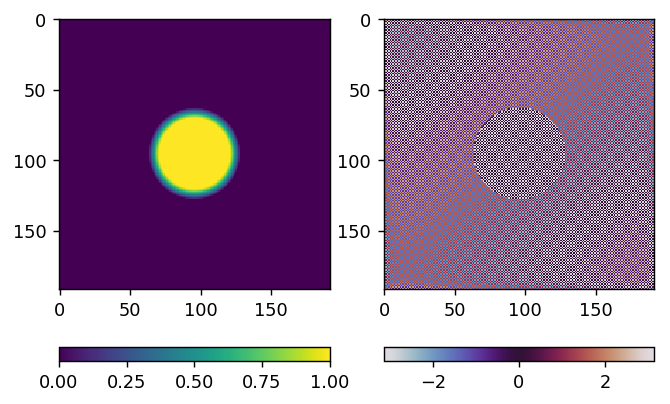

(-1.000000010433912-1.8119851252291915e-08j) (1.0000000106604823+1.787466343779591e-08j)


In [41]:
B = fresnel_propagation_ac(A, dx=1, z=20e-9, wavelength=1)
tike.plot_phase(B)